In [1]:
import sys
sys.path.append("/usr/local/lib/python3.8/dist-packages/")
sys.path.append("../")

from PIL import Image
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np
import os
import snook.data.blender as blender
import snook.data.generator as generator

In [2]:
RENDER_PATH = "test.png"
DATA_PATH = "test.txt"

In [3]:
blender.excomuniate_default_cube()

colors = generator.COLORS
balls  = [f"../resources/fbx/ball_{color}.fbx" for color in colors]
cue    = "../resources/fbx/cue.fbx"
pool   = "../resources/fbx/pool.fbx"
hdri   = "../resources/hdri"

scene = generator.Scene(
    generator.cFiles(balls, cue, pool, hdri),
    generator.cTable((2.07793, 1.03677), (0.25, 0.20), 1.70342),
    generator.cDistances(0.1, 1.5, (10.0, 20.0)),
)

FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000235 sec)

	FBX import: Templates...
		Done (0.000090 sec)

	FBX import: Nodes...
		Done (0.001108 sec)

	FBX import: Connections...
		Done (0.000086 sec)

	FBX import: Meshes...
		Done (0.016351 sec)

	FBX import: Materials & Textures...
		Done (0.008040 sec)

	FBX import: Cameras & Lamps...
		Done (0.000343 sec)

	FBX import: Objects & Armatures...
		Done (0.000381 sec)

	FBX import: ShapeKeys...
		Done (0.000131 sec)

	FBX import: Animations...
		Done (0.000090 sec)

	FBX import: Assign materials...
		Done (0.000300 sec)

	FBX import: Assign textures...
		Done (0.006013 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.001539 sec)

	Done (0.038239 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.001481 sec)

	FBX import: Templates...
		Done (0.000066 sec)

	FBX import: Nodes...

FBX Import: start importing ../resources/fbx/ball_yellow.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000937 sec)

	FBX import: Templates...
		Done (0.000092 sec)

	FBX import: Nodes...
		Done (0.000074 sec)

	FBX import: Connections...
		Done (0.000072 sec)

	FBX import: Meshes...
		Done (0.017230 sec)

	FBX import: Materials & Textures...
		Done (0.000826 sec)

	FBX import: Cameras & Lamps...
		Done (0.000653 sec)

	FBX import: Objects & Armatures...
		Done (0.000458 sec)

	FBX import: ShapeKeys...
		Done (0.000618 sec)

	FBX import: Animations...
		Done (0.000131 sec)

	FBX import: Assign materials...
		Done (0.000525 sec)

	FBX import: Assign textures...
		Done (0.000127 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000119 sec)

	Done (0.026891 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_yellow.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000713 sec)

	FBX import: Templates...
		Done (0.000087 sec)

	FBX import: Nodes.

FBX version: 7400
	FBX import: Prepare...
		Done (0.000738 sec)

	FBX import: Templates...
		Done (0.000551 sec)

	FBX import: Nodes...
		Done (0.000135 sec)

	FBX import: Connections...
		Done (0.000137 sec)

	FBX import: Meshes...
		Done (10.238678 sec)

	FBX import: Materials & Textures...
		Done (0.003191 sec)

	FBX import: Cameras & Lamps...
		Done (0.000115 sec)

	FBX import: Objects & Armatures...
		Done (0.000378 sec)

	FBX import: ShapeKeys...
		Done (0.000106 sec)

	FBX import: Animations...
		Done (0.000113 sec)

	FBX import: Assign materials...
		Done (0.000858 sec)

	FBX import: Assign textures...
		Done (0.000229 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000085 sec)

	Done (10.791600 sec)

Import finished.


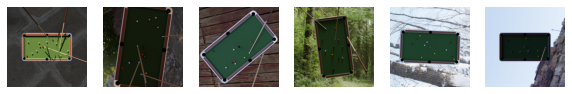

In [4]:
n = 6
plt.figure(figsize=(10, 8))
for i in tqdm(range(n)):
    scene.sample()
    scene.render(RENDER_PATH)
    
    plt.subplot(1, n, i + 1)
    plt.imshow(np.array(Image.open(RENDER_PATH).convert("RGB")))
    plt.axis("off")
    
    os.remove(RENDER_PATH)
plt.show()

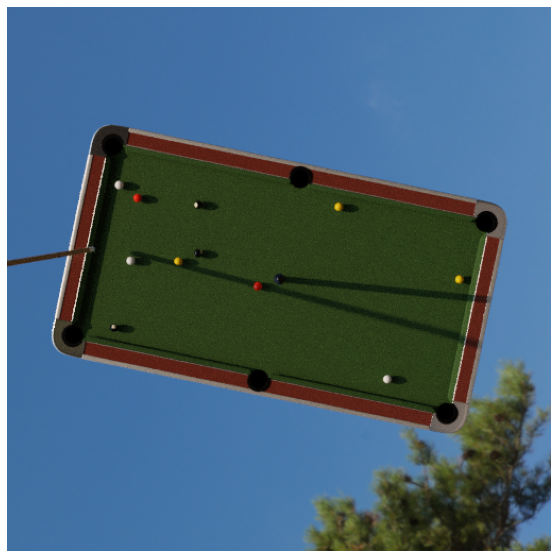

[24 balls] x y label
100 301 0
180 186 0
347 296 0
246 219 0
179 231 0
345 298 0
358 350 1
299 308 1
154 179 1
116 238 1
388 300 1
105 167 1
359 201 2
312 188 2
251 288 2
426 256 2
333 243 2
161 239 2
123 179 3
158 158 3
425 260 3
236 262 3
351 264 3
256 256 3

[6 cues] x y
82 227
253 212
260 274
434 229
232 166
256 256

[4 mask] x y
448 199
102 128
64 312
410 383



In [5]:
plt.figure(figsize=(10, 10))

scene.sample()
scene.render(RENDER_PATH)
scene.register(DATA_PATH)
    
plt.imshow(np.array(Image.open(RENDER_PATH).convert("RGB")))
plt.axis("off")
plt.show()

with open(DATA_PATH, "r") as f:
    print(f.read())

os.remove(RENDER_PATH)
os.remove(DATA_PATH)